In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
train=pd.read_csv("titanic_train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# checking missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

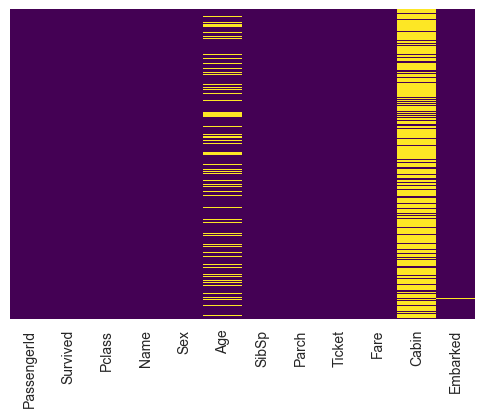

In [7]:
sns.heatmap(train.isnull(),cmap="viridis",yticklabels=False,cbar=False)

In [31]:
### 
from scipy.stats import mode
mode_embarked=train["Embarked"].mode()[0]
train["Embarked"]=train["Embarked"].fillna(mode_embarked)

In [32]:
###
age_mean_Pclass=train.pivot_table(values="Age",index="Pclass",aggfunc="mean")

In [33]:
train["Age"]=train[["Age","Pclass"]].apply(lambda x:
                                           age_mean_Pclass[x["Pclass"]] if pd.isnull(x["Age"])
                                          else x["Age"],axis=1)

In [34]:
###removing no use columns
train=train.drop(["Name","Ticket","Cabin"],axis=1)

In [35]:
train["Sex"]=train["Sex"].map({"female":1,"male":0}).astype(int)

In [40]:
embark=pd.get_dummies(train["Embarked"],prefix="Embarked")

In [41]:

train=pd.concat([train,embark],axis=1)

In [45]:
train.drop("Embarked",axis=1,inplace=True)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

paramter_grid={
    "max_features":[0.5,1.],
    "max_depth":[5.,None]
}
grid_search=GridSearchCV(RandomForestClassifier(n_estimators=100),paramter_grid,cv=10,verbose=3)

In [52]:
grid_search.fit(train.drop(["PassengerId","Survived"],axis=1),train["Survived"])

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] max_features=0.5, max_depth=5.0 .................................
[CV] ........ max_features=0.5, max_depth=5.0, score=0.788889 -   0.1s
[CV] max_features=0.5, max_depth=5.0 .................................
[CV] ........ max_features=0.5, max_depth=5.0, score=0.833333 -   0.1s
[CV] max_features=0.5, max_depth=5.0 .................................
[CV] ........ max_features=0.5, max_depth=5.0, score=0.752809 -   0.1s
[CV] max_features=0.5, max_depth=5.0 .................................
[CV] ........ max_features=0.5, max_depth=5.0, score=0.887640 -   0.1s
[CV] max_features=0.5, max_depth=5.0 .................................
[CV] ........ max_features=0.5, max_depth=5.0, score=0.898876 -   0.1s
[CV] max_features=0.5, max_depth=5.0 .................................
[CV] ........ max_features=0.5, max_depth=5.0, score=0.808989 -   0.1s
[CV] max_features=0.5, max_depth=5.0 .................................
[CV] ........ ma

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    5.7s


[CV] ....... max_features=1.0, max_depth=None, score=0.822222 -   0.1s
[CV] max_features=1.0, max_depth=None ................................
[CV] ....... max_features=1.0, max_depth=None, score=0.775281 -   0.1s
[CV] max_features=1.0, max_depth=None ................................
[CV] ....... max_features=1.0, max_depth=None, score=0.831461 -   0.1s
[CV] max_features=1.0, max_depth=None ................................
[CV] ....... max_features=1.0, max_depth=None, score=0.876404 -   0.2s
[CV] max_features=1.0, max_depth=None ................................
[CV] ....... max_features=1.0, max_depth=None, score=0.831461 -   0.1s
[CV] max_features=1.0, max_depth=None ................................
[CV] ....... max_features=1.0, max_depth=None, score=0.831461 -   0.1s
[CV] max_features=1.0, max_depth=None ................................
[CV] ....... max_features=1.0, max_depth=None, score=0.764045 -   0.1s
[CV] max_features=1.0, max_depth=None ................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    7.9s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [0.5, 1.0], 'max_depth': [5.0, None]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [53]:
grid_search.grid_scores_

[mean: 0.82828, std: 0.04579, params: {'max_features': 0.5, 'max_depth': 5.0},
 mean: 0.83165, std: 0.04826, params: {'max_features': 1.0, 'max_depth': 5.0},
 mean: 0.81145, std: 0.04911, params: {'max_features': 0.5, 'max_depth': None},
 mean: 0.81818, std: 0.04100, params: {'max_features': 1.0, 'max_depth': None}]

In [55]:
grid_search.best_params_

{'max_depth': 5.0, 'max_features': 1.0}

In [56]:
model=RandomForestClassifier(n_estimators=500,max_features=1.0,max_depth=5.0)
model.fit(train.drop(["PassengerId","Survived"],axis=1),train["Survived"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5.0, max_features=1.0, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
model.feature_importances_ 

array([ 0.15899213,  0.50270677,  0.1399024 ,  0.04410543,  0.00871149,
        0.12911123,  0.00441398,  0.00269938,  0.00935718])

In [69]:
train.columns[2:]

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

            importance
feature               
Sex              0.503
Pclass           0.159
Age              0.140
Fare             0.129
SibSp            0.044
Parch            0.009
Embarked_S       0.009
Embarked_C       0.004
Embarked_Q       0.003


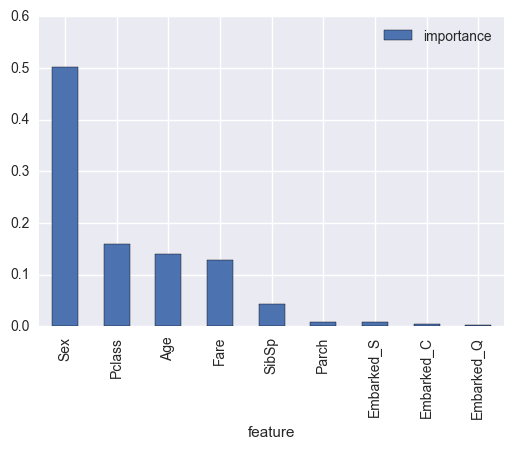

In [72]:
#show to plot importances
importances = pd.DataFrame({'feature':train.columns[2:],'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print (importances)
importances.plot.bar()